In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'data/customer_cluster.csv')

# 1.Cluster Assessment

In [ ]:
import pandas as pd

pop_mean = df[['recency_days', 'frequency', 'monetary']].mean()

# Group by Cluster and calculate Mean + Count
cluster_stats = df.groupby('Cluster_Label').agg({
    'Cluster_Label': 'count',          # Count number of customers
    'recency_days': 'mean',            # Average Recency
    'frequency': 'mean',               # Average Frequency
    'monetary': 'mean'                 # Average Monetary
}).rename(columns={'Cluster_Label': 'Count'})

# CALCULATE COMPARISON COLUMNS (vs Dataset Average)
# ---------------------------------------------------------
# Calculate % of total customers
total_customers = len(df)
cluster_stats['Percent_Total'] = (cluster_stats['Count'] / total_customers)

# Calculate relative difference vs overall mean
# Formula: (Cluster Mean - Overall Mean) / Overall Mean
cluster_stats['R_Diff'] = (cluster_stats['recency_days'] / pop_mean['recency_days']) - 1
cluster_stats['F_Diff'] = (cluster_stats['frequency'] / pop_mean['frequency']) - 1
cluster_stats['M_Diff'] = (cluster_stats['monetary'] / pop_mean['monetary']) - 1

# CREATE FINAL RESULT TABLE (FORMATTING)
# ---------------------------------------------------------
# Create a new dataframe for display (rename columns to English and reorder)
final_table = pd.DataFrame()

# Column 1 & 2: Customer count and % of total
final_table['Số KH'] = cluster_stats['Count']
final_table['% Tổng'] = cluster_stats['Percent_Total'].apply(lambda x: f"{x:.1%}")

# Column 3 & 4: Recency (Cluster average and % comparison)
final_table['Recency TB Cluster'] = cluster_stats['recency_days'].apply(lambda x: f"{x:,.0f} days")
final_table['Recency (vs Dataset Avg)'] = cluster_stats['R_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Column 5 & 6: Frequency
final_table['Frequency TB Cluster'] = cluster_stats['frequency'].apply(lambda x: f"{x:,.2f} orders")
final_table['Frequency (vs Dataset Avg)'] = cluster_stats['F_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Column 7 & 8: Monetary
final_table['Monetary TB Cluster'] = cluster_stats['monetary'].apply(lambda x: f"${x:,.0f}")
final_table['Monetary (vs Dataset Avg)'] = cluster_stats['M_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Reset index to move Cluster column to the front (as in the image)
final_table = final_table.reset_index().rename(columns={'Cluster_Label': 'Cluster'})
final_table = pd.DataFrame(final_table)

# Display final result table
final_table


,Cluster,Số KH,% Tổng,Recency TB Cluster,Recency (vs TB Dataset),Frequency TB Cluster,Frequency (vs TB Dataset),Monetary TB Cluster,Monetary (vs TB Dataset)
0,0,23584,25.3%,353 ngày,+48%,1.01 đơn,-3%,$60,-64%
1,1,23301,25.0%,105 ngày,-56%,1.06 đơn,+3%,$261,+58%
2,2,26812,28.7%,353 ngày,+48%,1.05 đơn,+2%,$251,+52%
3,3,19661,21.1%,102 ngày,-57%,1.01 đơn,-3%,$61,-63%


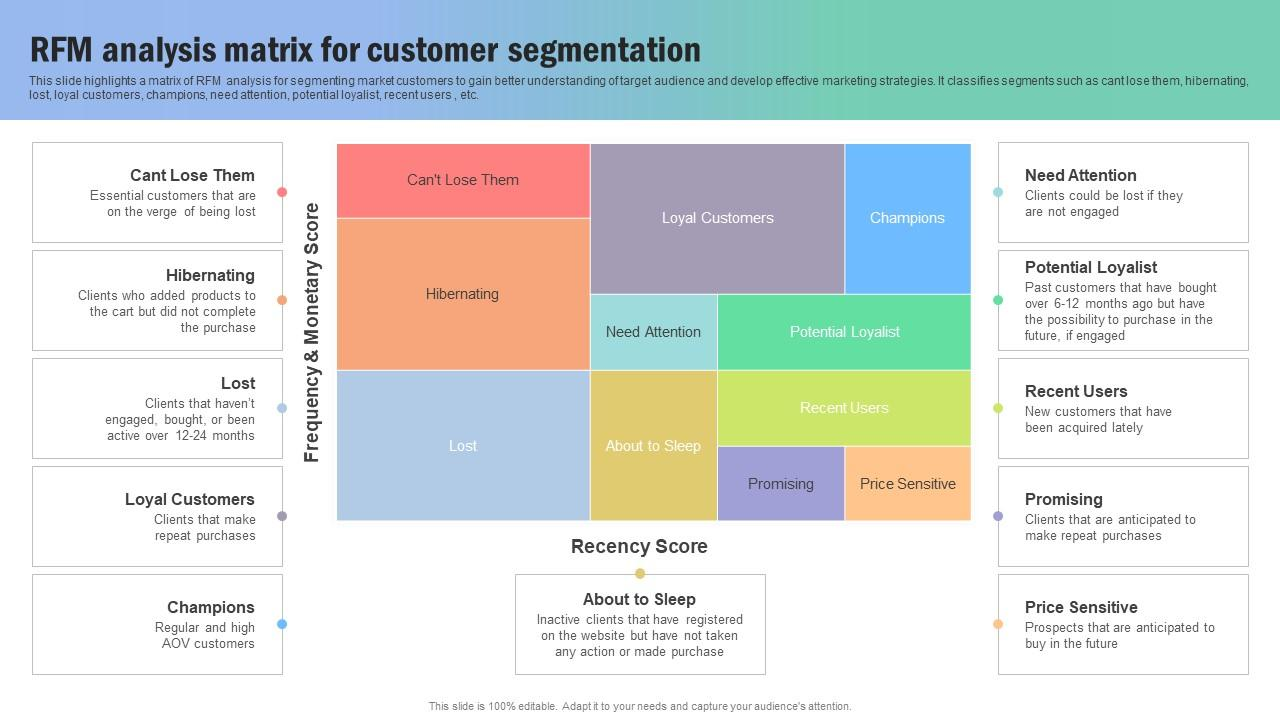


### Detailed Cluster Profiling

Based on the deviation from the population mean (dataset average), we can profile the clusters as follows:

#### **Cluster 0: The "Dormant Low-Value" Group (Lost)**
*   **Behavior:** They exhibit the worst metrics across the board: long absence (**Recency +48%**) and lowest spending (**Monetary -64%**).
*   **Naive Insight:** These customers are likely "lost causes." They haven't bought in a year and didn't spend much when they did.
*   **Strategic implication:** Lowest priority for marketing budget.
*   **Segmentation** LOST

#### **Cluster 1: The "Active High-Value" Group (The Stars)**
*   **Behavior:** They are the most recent purchasers (**Recency -56%** vs. baseline) and the highest spenders (**Monetary +58%**).
*   **Naive Insight:** These are the ideal customers. They have purchased recently (~105 days ago) and have a high average basket size ($261).
*   **Strategic implication:** Retention is key here.
*   **Segmentation** CHAMPIONS

#### **Cluster 2: The "Churned High-Value" Group (At Risk)**
*   **Behavior:** They share the high spending habits of Cluster 1 (**Monetary +52%**) but have not purchased in a very long time (**Recency +48%**, ~353 days).
*   **Naive Insight:** These are likely former VIPs or high-value customers who have churned or become dormant.
*   **Strategic implication:** This is the most critical group for a "Win-Back" campaign. The revenue potential is high ($251 avg), but they are disengaged.
*   **Segmentation** CAN'T LOSE THEM 

#### **Cluster 3: The "Recent Low-Value" Group (New/Casual)**
*   **Behavior:** They are very active recently (**Recency -57%**, ~102 days) but have low spending power (**Monetary -63%**, ~$61).
*   **Naive Insight:** These might be new customers acquired through recent promotions or casual buyers purchasing low-ticket items.
*   **Strategic implication:** Potential for up-selling or cross-selling to increase their Monetary value.
*   **Segmentation** PROMISING 

# 2.Data Preparation

# 3.Feature Engineer

# 4.Data Split

# 5.Model Training

## 5.1.Model Selection

## 5.2.Efficient Model

# 6.Top Feature Extraction and Model Retrain

# 7.Top Feature vs Cluster